In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

#### 1-Load Data

In [8]:
df=pd.read_csv("datasets/Mall_Customers.csv").drop(columns=["CustomerID","Genre","Age"])
df["labels"]=[0]*len(df)
df.head()

,Annual_Income_(k$),Spending_Score,labels
0,15,39,0
1,15,81,0
2,16,6,0
3,16,77,0
4,17,40,0


#### 2-Plot Raw Data

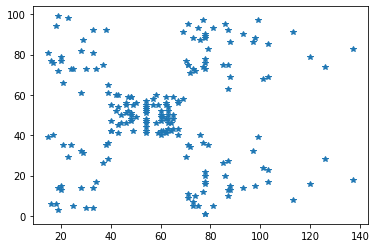

In [9]:
X,Y=df["Annual_Income_(k$)"].to_list(),df["Spending_Score" ].to_list()
plt.plot(X,Y,"*")

#### 3-Algorithm

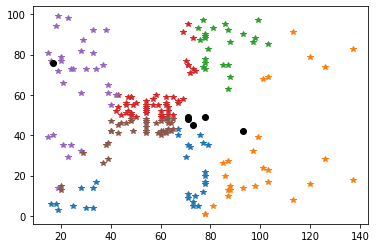

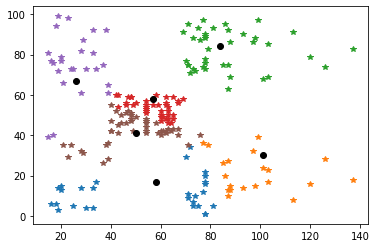

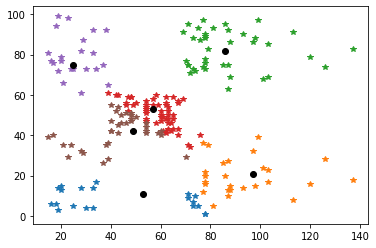

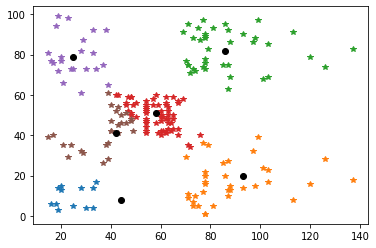

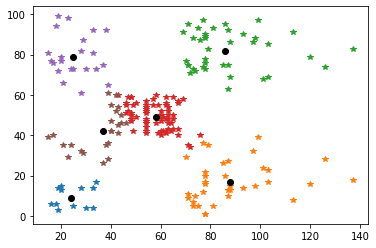

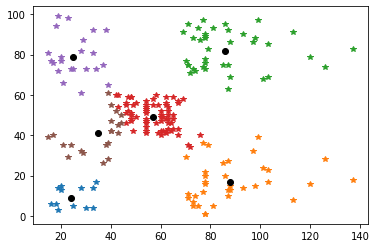

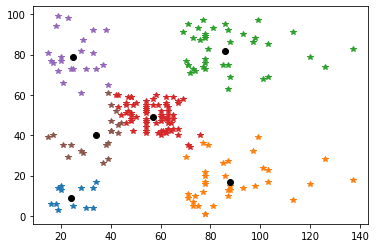

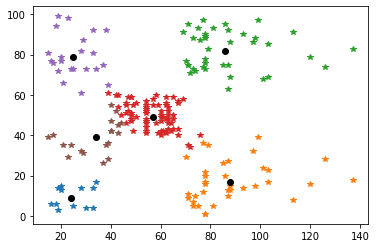

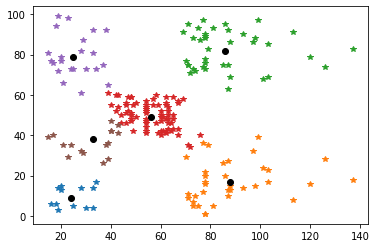

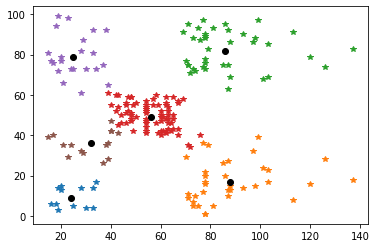

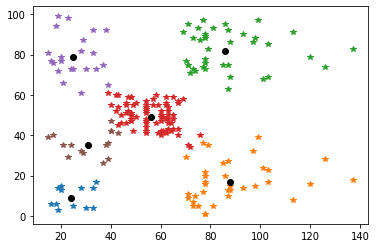

In [10]:
#Distancia de centroid a cada punto
def dist(centroid):
    return np.linalg.norm(df.drop(columns="labels").to_numpy() - centroid, axis=1)
    # x1,y1,x2,y2=df.iloc[:,1],df.iloc[:,2],centroid[0],centroid[1]
    # return ((x1-x2)**2+(y1-y2)**2)**0.5

#Recalcular centroids al centro de cada cluster
def recalculate_centroids():
    groups = df.groupby("labels")
    centroids=[]
    for name,group in groups:
        x,y=int(group["Annual_Income_(k$)"].mean()), int(group["Spending_Score"].mean())
        centroids.append((x,y))
    return centroids

#Dibujar data
def plot_data(centroids):
    groups = df.groupby("labels")
    for name, group in groups:
        plt.plot(group["Annual_Income_(k$)"], group["Spending_Score"],"*", label=name)
    for c in centroids:
        plt.plot(c[0],c[1],"ko")
    plt.show()

#Elegir k
k=6
#Elegir centroids aleatoriamente
centroids=[(random.sample(X,1)[0],random.sample(Y,1)[0]) for i in range(k)]
#Iterativamente converger los centroids
for i in range(10000):
    #Calcular distancias de cada punto a cada centroid
    distances=[]
    for c in centroids:
        distances.append(dist(c))
    distances=pd.DataFrame(np.transpose(distances))
    #Atribuir a cada punto el centroid mas cercano
    labels=distances.idxmin(axis=1)
    df["labels"]=labels
    plot_data(centroids)
    #Recalcular los centroid
    new_centroids=recalculate_centroids()
    #Si los centroid no han cambiado, significa que han convergido, y terminamos
    if new_centroids==centroids:
        break
    centroids=new_centroids
